In [1]:
#Import the required packages with their customary aliases
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Use the %matplotlib inline command so that your plots show in the notebook without having to call plt.show() every time
%matplotlib inline

In [2]:
#Using the pandas function, import the GDP dataset into your notebook as a DataFrame called gdp_df
gdp_df = pd.read_csv('data/gdp_percapita.csv',nrows=6500)
#do not use error_bad_lines=False bacause you will loose alot fo data. Go only to where your data ends.donot include the footnotes.

In [3]:
#Take a look at the first 6 rows.
gdp_df.head(6)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2017,1758.465636,NaN
1,Afghanistan,2016,1757.023490,NaN
2,Afghanistan,2015,1766.593077,NaN
3,Afghanistan,2014,1795.735834,NaN
4,Afghanistan,2013,1807.762344,NaN
5,Afghanistan,2012,1772.764974,NaN


In [4]:
gdp_df.tail()


,Country or Area,Year,Value,Value Footnotes
6495,Zimbabwe,1994,2768.309953,NaN
6496,Zimbabwe,1993,2572.870395,NaN
6497,Zimbabwe,1992,2591.007534,NaN
6498,Zimbabwe,1991,2906.272849,NaN
6499,Zimbabwe,1990,2819.549467,NaN


In [5]:
internet_df = pd.read_csv('data/internet_use.csv',nrows=4495)

In [6]:
internet_df.head(6)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN
5,Afghanistan,2009,3.550000,NaN


In [7]:
internet_df.tail(6)

,Country or Area,Year,Value,Value Footnotes
4489,Zimbabwe,1998,0.081648,NaN
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN
4494,Zimbabwe,1990,0.000000,NaN


In [8]:
#Look at the shape of each dataframe - how many rows, how many columns.
gdp_df.shape

(6500, 4)

In [9]:
internet_df.shape

(4495, 4)

In [10]:
#Take a look at the data types for the columns in each table.
gdp_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

In [11]:
#take a look at the data and delete any rows that are footnotes or have a zero as year. 
internet_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

In [12]:
#Take a look at the last 10 rows of each dataset in turn.
gdp_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
6490,Zimbabwe,1999,3054.064189,NaN
6491,Zimbabwe,1998,3099.076182,NaN
6492,Zimbabwe,1997,3036.422224,NaN
6493,Zimbabwe,1996,2985.856605,NaN
6494,Zimbabwe,1995,2736.486436,NaN
6495,Zimbabwe,1994,2768.309953,NaN
6496,Zimbabwe,1993,2572.870395,NaN
6497,Zimbabwe,1992,2591.007534,NaN
6498,Zimbabwe,1991,2906.272849,NaN
6499,Zimbabwe,1990,2819.549467,NaN


In [13]:
internet_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
4485,Zimbabwe,2002,3.994356,NaN
4486,Zimbabwe,2001,0.799846,NaN
4487,Zimbabwe,2000,0.401434,NaN
4488,Zimbabwe,1999,0.161676,NaN
4489,Zimbabwe,1998,0.081648,NaN
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN
4494,Zimbabwe,1990,0.000000,NaN


In [14]:
#Drop the 'value footnotes' data (column) from both datasets
gdp_df = gdp_df.drop(columns = 'Value Footnotes')
gdp_df.head()

,Country or Area,Year,Value
0,Afghanistan,2017,1758.465636
1,Afghanistan,2016,1757.023490
2,Afghanistan,2015,1766.593077
3,Afghanistan,2014,1795.735834
4,Afghanistan,2013,1807.762344


In [15]:
internet_df = internet_df.drop(columns = 'Value Footnotes')
internet_df.head()

,Country or Area,Year,Value
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000


In [16]:
#Change the columns for the GDP Per Capita data frame to ‘Country’, ‘Year’, and ‘GDP_Per_Capita’.
gdp_df = gdp_df.rename(columns = {'Country or Area':'Country', 'Year':'Year', 'Value':'gdp_per_capita'})
gdp_df.head()

,Country,Year,gdp_per_capita
0,Afghanistan,2017,1758.465636
1,Afghanistan,2016,1757.023490
2,Afghanistan,2015,1766.593077
3,Afghanistan,2014,1795.735834
4,Afghanistan,2013,1807.762344


In [17]:
#Change the columns for the Internet Users data frame to ‘Country’, ‘Year’, and ‘Internet_Users_Pct’.
internet_df = internet_df.rename(columns = {'Country or Area':'Country', 'Year':'Year', 'Value':'Internet_Users_Pct'})
internet_df.head()

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000


In [18]:
gdp_df.dtypes

Country            object
Year                int64
gdp_per_capita    float64
dtype: object

In [19]:
internet_df.dtypes
# The Year type in gdp_df is and int while in Internet_df was an object.

Country                object
Year                    int64
Internet_Users_Pct    float64
dtype: object

In [20]:
#Merge the two DataFrames to one. Merge all rows from each of the two DataFrames. Call the new DataFrame gdp_and_internet_use
gdp_and_internet_use = pd.merge(gdp_df, internet_df, on=['Country','Year'], how='inner')
gdp_and_internet_use.head()

,Country,Year,gdp_per_capita,Internet_Users_Pct
0,Afghanistan,2014,1795.735834,6.390000
1,Afghanistan,2013,1807.762344,5.900000
2,Afghanistan,2012,1772.764974,5.454545
3,Afghanistan,2011,1626.764793,5.000000
4,Afghanistan,2010,1671.581238,4.000000


In [21]:
#Look at the last five rows to make sure the data is clean and as expected.
gdp_and_internet_use.tail()

,Country,Year,gdp_per_capita,Internet_Users_Pct
3514,Zimbabwe,1997,3036.422224,0.033080
3515,Zimbabwe,1996,2985.856605,0.016790
3516,Zimbabwe,1995,2736.486436,0.007684
3517,Zimbabwe,1994,2768.309953,0.001739
3518,Zimbabwe,1990,2819.549467,0.000000


In [22]:
#Subset the combined data frame to keep only the data for 2004, 2009, and 2014. Check that this happened correctly.
years = [2004,2009,2014]

In [23]:
years

[2004, 2009, 2014]

In [24]:
gdp_and_internet_use = gdp_and_internet_use.loc[gdp_and_internet_use.Year.isin(years)]

In [25]:
gdp_and_internet_use.head()

,Country,Year,gdp_per_capita,Internet_Users_Pct
0,Afghanistan,2014,1795.735834,6.390000
5,Afghanistan,2009,1502.354073,3.550000
10,Afghanistan,2004,1025.208245,0.105809
13,Albania,2014,10700.522802,60.100000
18,Albania,2009,9525.372374,41.200000


In [26]:
gdp_and_internet_use.tail()

,Country,Year,gdp_per_capita,Internet_Users_Pct
3480,Zambia,2009,3115.937579,6.310000
3485,Zambia,2004,2415.590117,2.013550
3497,Zimbabwe,2014,2506.490220,19.890000
3502,Zimbabwe,2009,1632.999866,11.360000
3507,Zimbabwe,2004,2104.143512,6.564045


In [27]:
#Create three new data frames, one for 2004, one for 2009, and one for 2014. 
Year_2004 = gdp_and_internet_use.loc[gdp_and_internet_use.Year == 2004]

In [28]:
Year_2004.head()

,Country,Year,gdp_per_capita,Internet_Users_Pct
10,Afghanistan,2004,1025.208245,0.105809
23,Albania,2004,7001.054941,2.420388
44,Algeria,2004,11847.319747,4.634475
66,Angola,2004,4604.657044,0.464815
86,Antigua and Barbuda,2004,21183.426857,24.266544


In [29]:
Year_2009 = gdp_and_internet_use.loc[gdp_and_internet_use.Year == 2009]

In [30]:
Year_2009.head()

,Country,Year,gdp_per_capita,Internet_Users_Pct
5,Afghanistan,2009,1502.354073,3.55
18,Albania,2009,9525.372374,41.20
39,Algeria,2009,12694.745562,11.23
61,Angola,2009,6292.534856,6.00
81,Antigua and Barbuda,2009,22592.413330,42.00


In [31]:
Year_2014 = gdp_and_internet_use.loc[gdp_and_internet_use.Year == 2014]

In [32]:
Year_2014.head()

,Country,Year,gdp_per_capita,Internet_Users_Pct
0,Afghanistan,2014,1795.735834,6.39
13,Albania,2014,10700.522802,60.10
34,Algeria,2014,13549.025150,18.09
56,Angola,2014,6813.052106,21.26
76,Antigua and Barbuda,2014,20820.551057,64.00


In [33]:
#Which country had the highest percentage of internet users in 2014? What was the percentage?
Year_2014[Year_2014.Internet_Users_Pct == Year_2014.Internet_Users_Pct.max ()]

,Country,Year,gdp_per_capita,Internet_Users_Pct
1395,Iceland,2014,42774.888851,98.16


In [34]:
#Which country had the lowest percentage of internet users in 2014? What was the percentage?
Year_2014[Year_2014.Internet_Users_Pct == Year_2014.Internet_Users_Pct.min ()]

,Country,Year,gdp_per_capita,Internet_Users_Pct
3104,Timor-Leste,2014,6466.737708,1.14


In [35]:
Year_2004[Year_2004.Internet_Users_Pct == Year_2004.Internet_Users_Pct.max ()]

,Country,Year,gdp_per_capita,Internet_Users_Pct
3002,Sweden,2004,40299.920252,83.89


In [36]:
Year_2004[Year_2004.Internet_Users_Pct == Year_2004.Internet_Users_Pct.min ()]

,Country,Year,gdp_per_capita,Internet_Users_Pct
2146,Myanmar,2004,1999.710075,0.024337


In [37]:
Year_2009[Year_2009.Internet_Users_Pct == Year_2009.Internet_Users_Pct.max ()]

,Country,Year,gdp_per_capita,Internet_Users_Pct
1400,Iceland,2009,41505.084835,93.0


In [38]:
Year_2009[Year_2009.Internet_Users_Pct == Year_2009.Internet_Users_Pct.min ()]

,Country,Year,gdp_per_capita,Internet_Users_Pct
3109,Timor-Leste,2009,9275.529304,0.185252


In [39]:
Year_2014[Year_2014.gdp_per_capita == Year_2014.gdp_per_capita.max ()]

,Country,Year,gdp_per_capita,Internet_Users_Pct
2556,Qatar,2014,116693.507701,91.49


In [40]:
Year_2014[Year_2014.gdp_per_capita == Year_2014.gdp_per_capita.min ()]

,Country,Year,gdp_per_capita,Internet_Users_Pct
1983,Mauritania,2014,377.908916,10.7


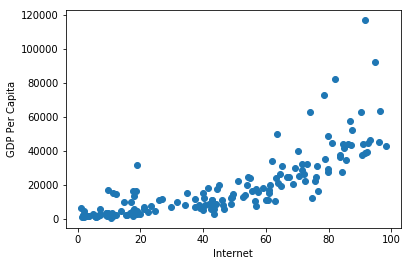

In [41]:
#Create some scatterplots:2014 Percent Using the Internet vs GDP Per Capita
plt.scatter(Year_2014.Internet_Users_Pct, Year_2014.gdp_per_capita,)
plt.xlabel('Internet')
plt.ylabel('GDP Per Capita')
plt.show()

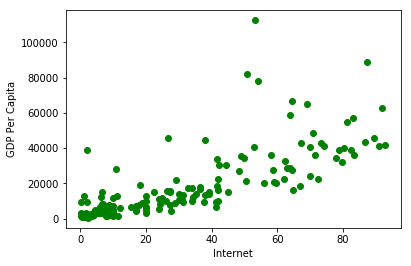

In [42]:
#Create some scatterplots:2009 Percent Using the Internet vs GDP Per Capita
plt.scatter(Year_2009.Internet_Users_Pct, Year_2009.gdp_per_capita, color = 'green')
plt.xlabel('Internet')
plt.ylabel('GDP Per Capita')
plt.show()

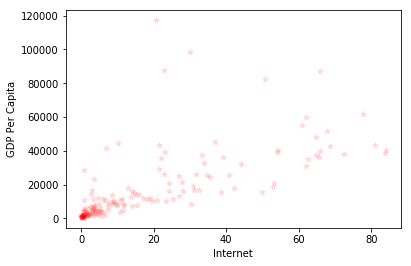

In [43]:
#Create some scatterplots:2004 Percent Using the Internet vs GDP Per Capita
plt.scatter(Year_2004.Internet_Users_Pct, Year_2004.gdp_per_capita, color = 'red',marker = '*', alpha=0.1)
plt.xlabel('Internet')
plt.ylabel('GDP Per Capita')
plt.show()

There were more internet users in countries with low GDP Per capita for the years 2004 and 2009. By the Year 2014 there was a linear distribution.


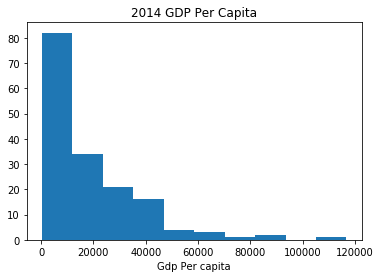

In [44]:
#Look at the distribution of gdp per capita values for 2014. Is it unimodal?
plt.hist(Year_2014.gdp_per_capita)
plt.xlabel('Gdp Per capita')
plt.title('2014 GDP Per Capita')
plt.show()

The 2014 GDP Per Capita shows unimodal Distribution

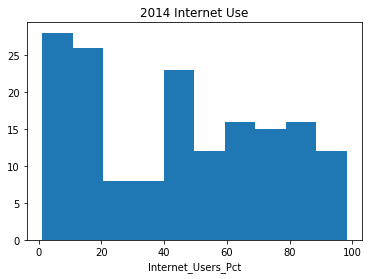

In [45]:
#Look at the distribution of Internet Use for 2014. Is it unimodal?
plt.hist(Year_2014.Internet_Users_Pct)
plt.xlabel('Internet_Users_Pct')
plt.title('2014 Internet Use')
plt.show()

The 2014 Internet Use shows non_unimodal Distribution

In [46]:
#What are the top 5 countries in terms of internet use in 2014?
Top_5_2014 = Year_2014.nlargest(5,'Internet_Users_Pct')
Top_5_2014

,Country,Year,gdp_per_capita,Internet_Users_Pct
1395,Iceland,2014,42774.888851,98.16
2310,Norway,2014,63419.314779,96.30
854,Denmark,2014,45057.074170,95.99
1812,Luxembourg,2014,92349.186486,94.67
2199,Netherlands,2014,46238.209702,93.17


In [47]:
#What are the same  5 countries in terms of internet use in 2009?
my_2009_internet_users = Year_2009[Year_2009["Country"].isin(["Iceland", "Norway", "Denmark", "Luxembourg", "Netherlands"])]
my_2009_internet_users

,Country,Year,gdp_per_capita,Internet_Users_Pct
859,Denmark,2009,43382.625459,86.84
1400,Iceland,2009,41505.084835,93.00
1817,Luxembourg,2009,89098.734244,87.31
2204,Netherlands,2009,45724.862767,89.63
2315,Norway,2009,62698.285355,92.08


In [48]:
#What are the same countries in terms of internet use in 2004?
my_2004_internet_users = Year_2004[Year_2004["Country"].isin(["Iceland", "Norway", "Denmark", "Luxembourg", "Netherlands"])]
my_2004_internet_users

,Country,Year,gdp_per_capita,Internet_Users_Pct
864,Denmark,2004,43670.445300,80.93
1405,Iceland,2004,38893.378800,83.88
1822,Luxembourg,2004,87209.819398,65.88
2209,Netherlands,2004,43048.313769,68.52
2320,Norway,2004,61675.600782,77.69


In [49]:
#Create a data frame called top_5_internet from the combined data frame that has all three years for these 5 countries.
top_5_internet = pd.concat([Top_5_2014, my_2009_internet_users, my_2004_internet_users])
top_5_internet

,Country,Year,gdp_per_capita,Internet_Users_Pct
1395,Iceland,2014,42774.888851,98.16
2310,Norway,2014,63419.314779,96.30
854,Denmark,2014,45057.074170,95.99
1812,Luxembourg,2014,92349.186486,94.67
2199,Netherlands,2014,46238.209702,93.17
859,Denmark,2009,43382.625459,86.84
1400,Iceland,2009,41505.084835,93.00
1817,Luxembourg,2009,89098.734244,87.31
2204,Netherlands,2009,45724.862767,89.63
2315,Norway,2009,62698.285355,92.08


In [50]:
top_5_internet.shape

(15, 4)

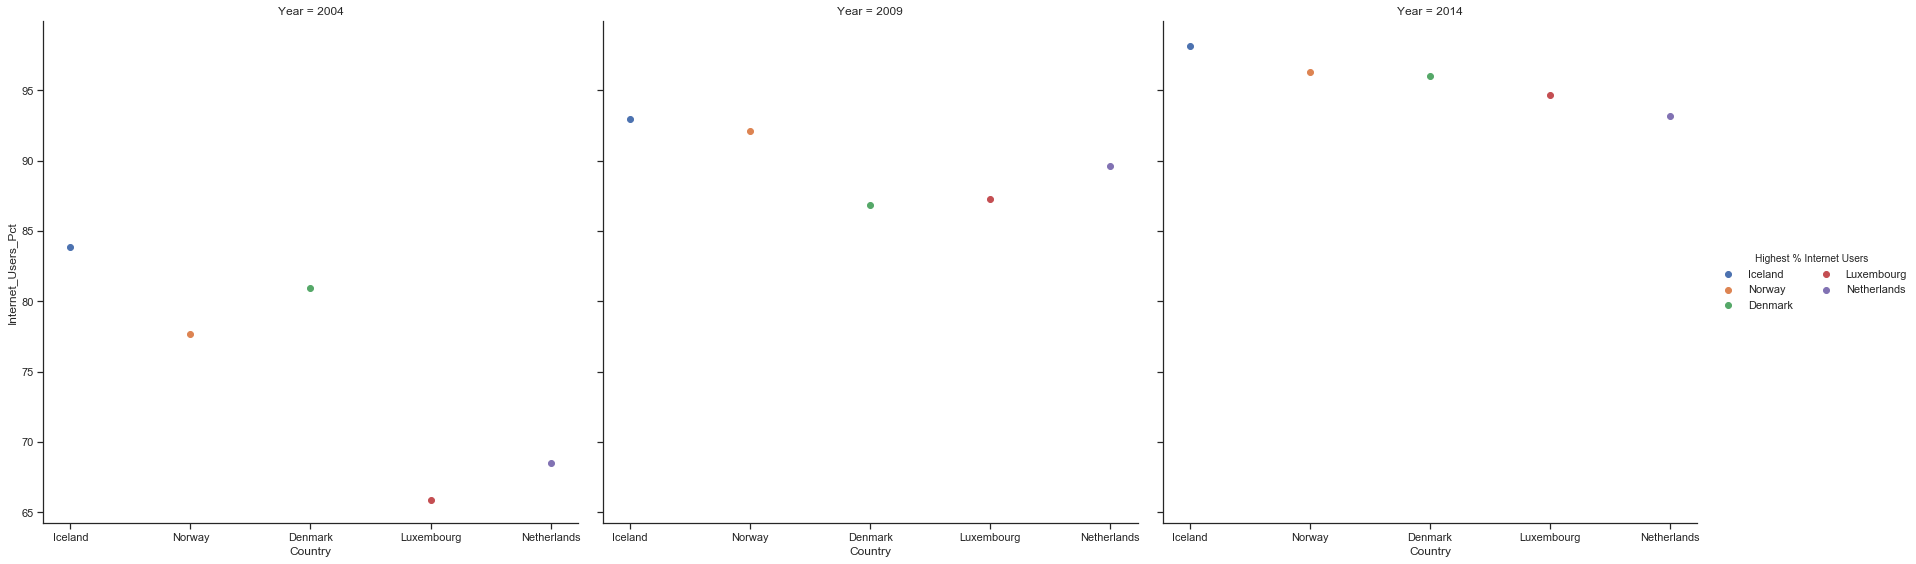

In [51]:
sns.set(style="ticks")
grid = sns.FacetGrid(top_5_internet,
                    col="Year", hue="Country", col_wrap=3, height=8)
grid.map(plt.scatter, "Country", "Internet_Users_Pct")
grid.add_legend(ncol = 2, title = 'Highest % Internet Users');

In [52]:
#the trend for the 5 countries with the lowest 2014 internet usage
low_5_2014 = Year_2014.nsmallest(5,'Internet_Users_Pct')
low_5_2014

,Country,Year,gdp_per_capita,Internet_Users_Pct
3104,Timor-Leste,2014,6466.737708,1.14
539,Burundi,2014,768.469837,1.38
1275,Guinea,2014,1836.561073,1.72
2270,Niger,2014,900.136918,1.95
2136,Myanmar,2014,4737.459861,2.10


In [53]:
my_2009_low_countries = Year_2009[Year_2009["Country"].isin(["Timor-Leste", "Burundi", "Guinea", "Niger", "Myanmar"])]
my_2009_low_countries

,Country,Year,gdp_per_capita,Internet_Users_Pct
544,Burundi,2009,721.063140,0.900000
1280,Guinea,2009,1626.174435,0.940000
2141,Myanmar,2009,3387.818242,0.220000
2275,Niger,2009,778.982257,0.760000
3109,Timor-Leste,2009,9275.529304,0.185252


In [54]:
my_2004_low_countries = Year_2004[Year_2004["Country"].isin(["Timor-Leste", "Burundi", "Guinea", "Niger", "Myanmar"])]
my_2004_low_countries

,Country,Year,gdp_per_capita,Internet_Users_Pct
549,Burundi,2004,708.833720,0.349060
1285,Guinea,2004,1583.618832,0.508819
2146,Myanmar,2004,1999.710075,0.024337
2280,Niger,2004,757.751262,0.189934


In [55]:
Low_2014_2004 = pd.concat([low_5_2014, my_2009_low_countries, my_2004_low_countries])
Low_2014_2004

,Country,Year,gdp_per_capita,Internet_Users_Pct
3104,Timor-Leste,2014,6466.737708,1.140000
539,Burundi,2014,768.469837,1.380000
1275,Guinea,2014,1836.561073,1.720000
2270,Niger,2014,900.136918,1.950000
2136,Myanmar,2014,4737.459861,2.100000
544,Burundi,2009,721.063140,0.900000
1280,Guinea,2009,1626.174435,0.940000
2141,Myanmar,2009,3387.818242,0.220000
2275,Niger,2009,778.982257,0.760000
3109,Timor-Leste,2009,9275.529304,0.185252


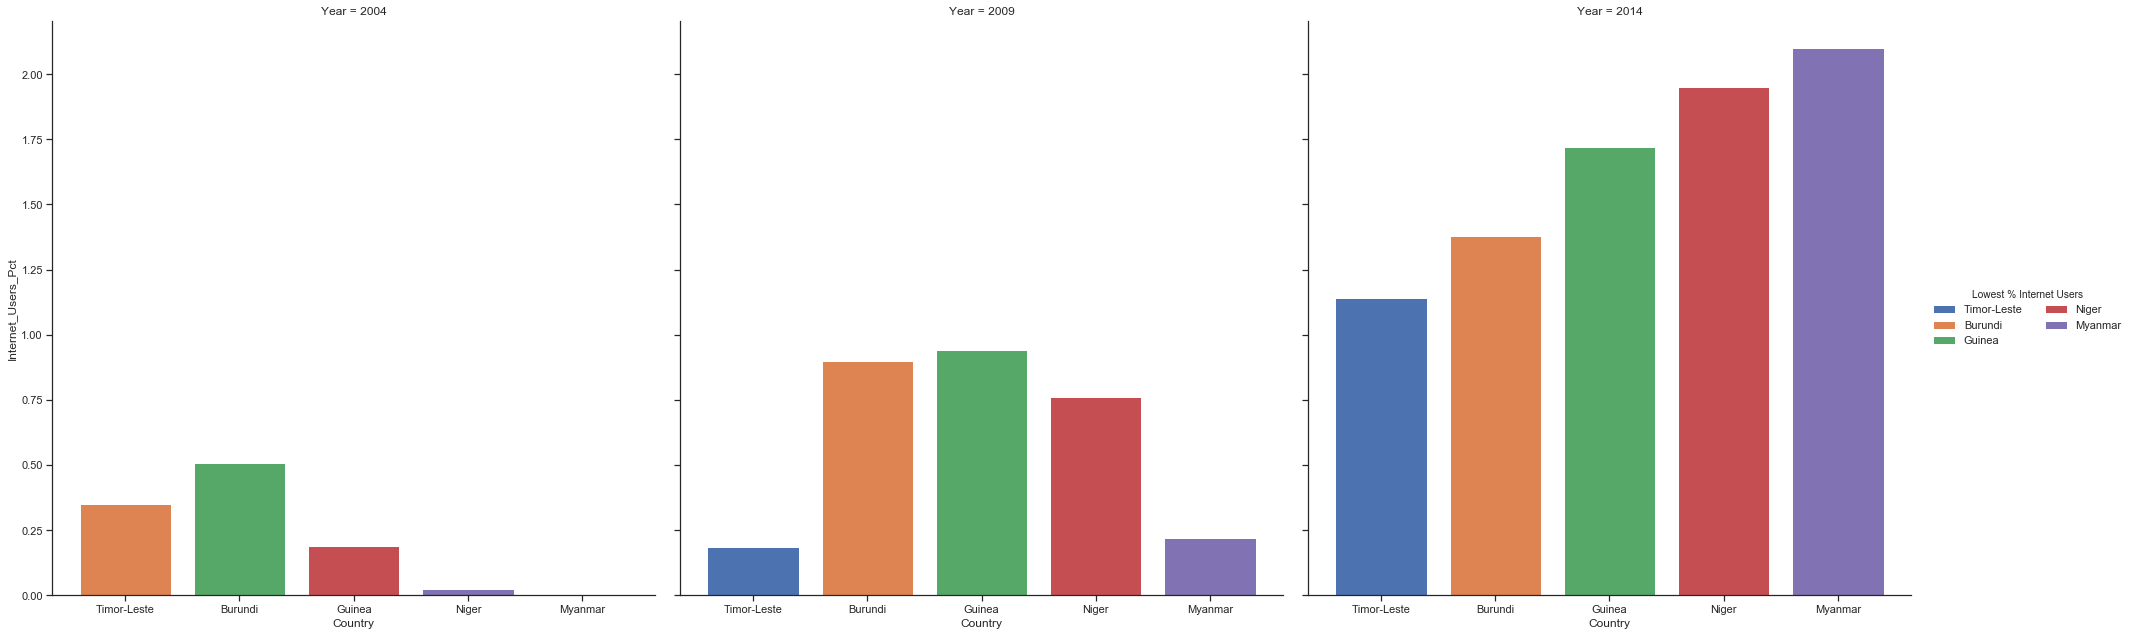

In [56]:
sns.set(style="ticks")
grid = sns.FacetGrid(Low_2014_2004,
                    col="Year", hue="Country", col_wrap=3, height=9)
grid.map(plt.bar, "Country", "Internet_Users_Pct")
grid.add_legend(ncol = 2, title = 'Lowest % Internet Users');

In [57]:
#Find the top 5 countries for 2014 in terms of GDP per capita;
top_5_gdp_2014 = Year_2014.nlargest(5,'gdp_per_capita')

In [58]:
top_5_gdp_2014

,Country,Year,gdp_per_capita,Internet_Users_Pct
2556,Qatar,2014,116693.507701,91.49
1812,Luxembourg,2014,92349.186486,94.67
2765,Singapore,2014,81965.361071,82.00
1685,Kuwait,2014,72588.486007,78.70
2310,Norway,2014,63419.314779,96.30


In [59]:
same_country_2009 = Year_2009[Year_2009["Country"].isin(["Qatar", "Luxembourg", "Singapore", "Kuwait", "Norway"])]
same_country_2009

,Country,Year,gdp_per_capita,Internet_Users_Pct
1690,Kuwait,2009,81861.379333,50.80
1817,Luxembourg,2009,89098.734244,87.31
2315,Norway,2009,62698.285355,92.08
2561,Qatar,2009,112525.718267,53.10
2770,Singapore,2009,64934.799310,69.00


In [60]:
same_country_2004 = Year_2004[Year_2004["Country"].isin(["Qatar", "Luxembourg", "Singapore", "Kuwait", "Norway"])]

In [61]:
same_country_2004

,Country,Year,gdp_per_capita,Internet_Users_Pct
1695,Kuwait,2004,87851.463113,22.927112
1822,Luxembourg,2004,87209.819398,65.880000
2320,Norway,2004,61675.600782,77.690000
2566,Qatar,2004,117271.427067,20.701648
2775,Singapore,2004,59732.958543,62.000000


In [62]:
ten_year_trend = pd.concat([same_country_2004, same_country_2009, top_5_gdp_2014])
ten_year_trend

,Country,Year,gdp_per_capita,Internet_Users_Pct
1695,Kuwait,2004,87851.463113,22.927112
1822,Luxembourg,2004,87209.819398,65.880000
2320,Norway,2004,61675.600782,77.690000
2566,Qatar,2004,117271.427067,20.701648
2775,Singapore,2004,59732.958543,62.000000
1690,Kuwait,2009,81861.379333,50.800000
1817,Luxembourg,2009,89098.734244,87.310000
2315,Norway,2009,62698.285355,92.080000
2561,Qatar,2009,112525.718267,53.100000
2770,Singapore,2009,64934.799310,69.000000


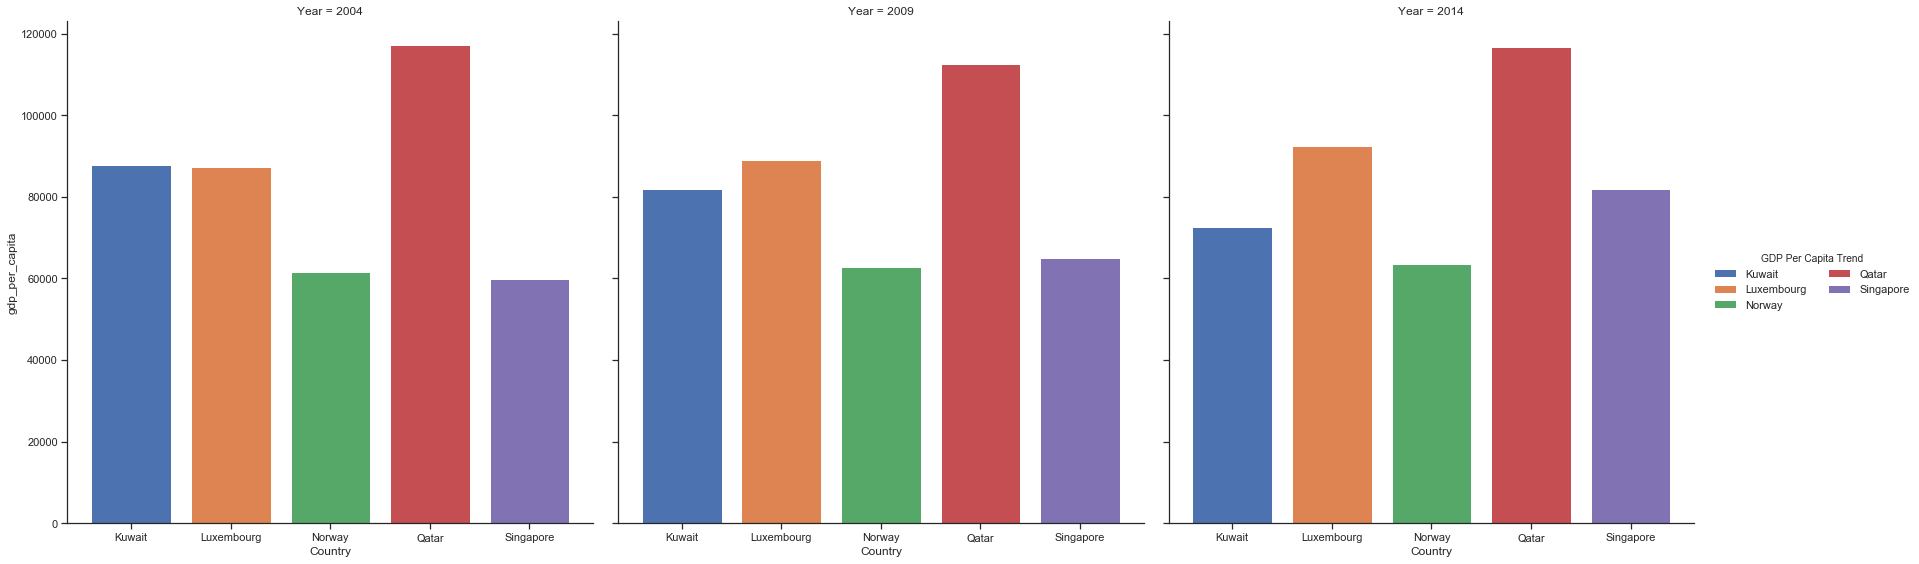

In [63]:
sns.set(style="ticks")
grid = sns.FacetGrid(ten_year_trend,
                    col="Year", hue="Country", col_wrap=3, height=8)
grid.map(plt.bar, "Country", "gdp_per_capita")
grid.add_legend(ncol = 2, title = 'GDP Per Capita Trend');

In [64]:
#bottom 5 countries for 2014 in terms of GDP per capita.
low_5_gdp_2014 = Year_2014.nsmallest(5,'gdp_per_capita')
low_5_gdp_2014

,Country,Year,gdp_per_capita,Internet_Users_Pct
1983,Mauritania,2014,377.908916,10.70
539,Burundi,2014,768.469837,1.38
2270,Niger,2014,900.136918,1.95
2116,Mozambique,2014,1117.872529,5.94
1856,Malawi,2014,1142.530804,5.83


In [65]:
same_country_2004 = Year_2004[Year_2004["Country"].isin(["Mauritania","Burundi","Niger","Mozambique","Malawi"])]
same_country_2004

,Country,Year,gdp_per_capita,Internet_Users_Pct
549,Burundi,2004,708.833720,0.349060
1866,Malawi,2004,862.392437,0.347505
1993,Mauritania,2004,291.842348,0.481470
2126,Mozambique,2004,717.599291,0.679448
2280,Niger,2004,757.751262,0.189934


In [66]:
same_country_2009 = Year_2009[Year_2009["Country"].isin(["Mauritania","Burundi","Niger","Mozambique","Malawi"])]
same_country_2009

,Country,Year,gdp_per_capita,Internet_Users_Pct
544,Burundi,2009,721.063140,0.90
1861,Malawi,2009,1037.598513,1.07
1988,Mauritania,2009,336.748688,2.28
2121,Mozambique,2009,910.086596,2.68
2275,Niger,2009,778.982257,0.76


In [67]:
import chart_studio

,Country,Year,gdp_per_capita,Internet_Users_Pct
1983,Mauritania,2014,377.908916,10.700000
539,Burundi,2014,768.469837,1.380000
2270,Niger,2014,900.136918,1.950000
2116,Mozambique,2014,1117.872529,5.940000
1856,Malawi,2014,1142.530804,5.830000
544,Burundi,2009,721.063140,0.900000
1861,Malawi,2009,1037.598513,1.070000
1988,Mauritania,2009,336.748688,2.280000
2121,Mozambique,2009,910.086596,2.680000
2275,Niger,2009,778.982257,0.760000


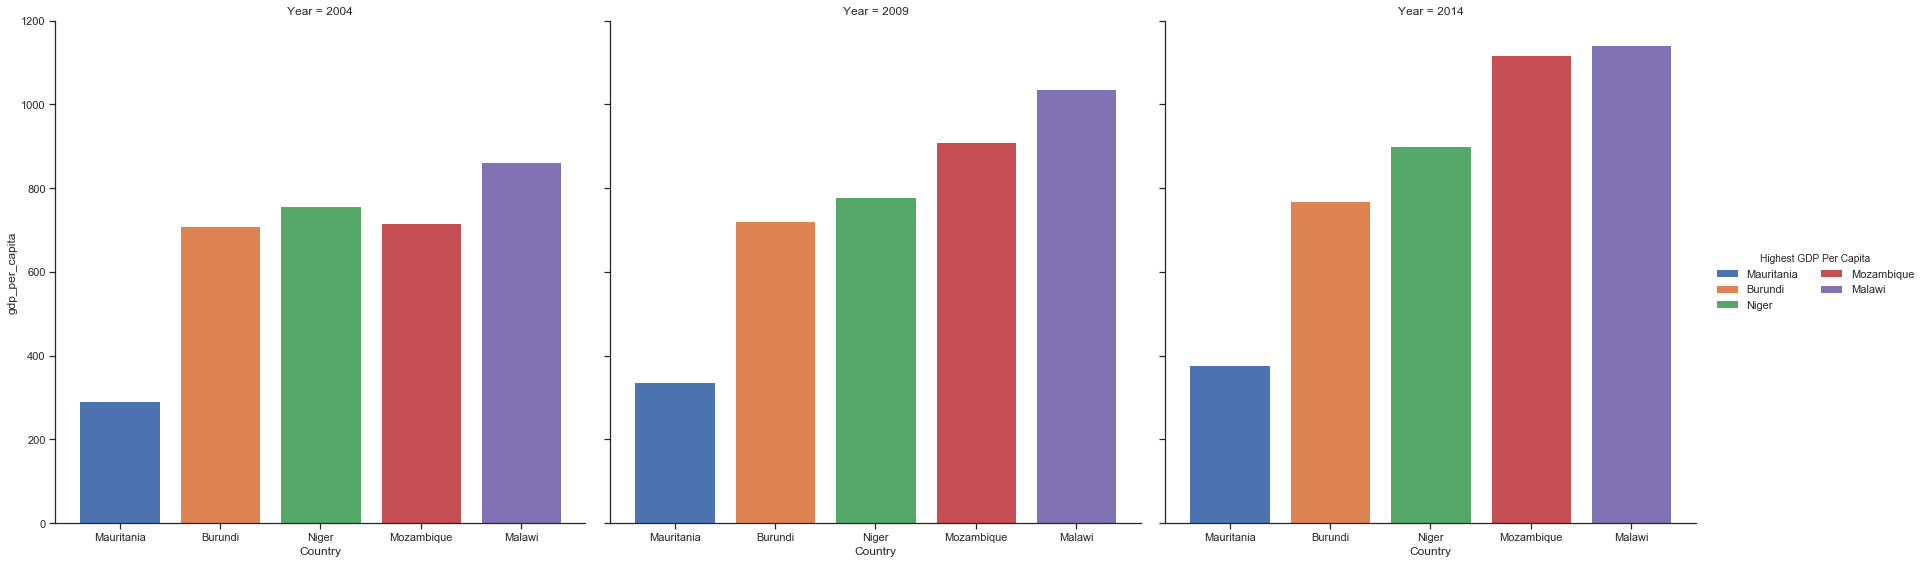

In [68]:
sns.set(style="ticks")
grid = sns.FacetGrid(Low_countries_gdp_combined,
                    col="Year", hue="Country", col_wrap=3, height=8)
grid.map(plt.bar, "Country", "gdp_per_capita")
grid.add_legend(ncol = 2, title = 'Highest GDP Per Capita');

In [69]:
food_prod = pd.read_csv('data/food_production.csv', nrows=52180)
food_prod.head()

,Country or Area,Element,Year,Unit,Value,Value Footnotes
0,Afghanistan,Gross Production Index Number (2004-2006 = 100),2016,Int. $,125.39,Fc
1,Afghanistan,Gross Production Index Number (2004-2006 = 100),2015,Int. $,119.68,Fc
2,Afghanistan,Gross Production Index Number (2004-2006 = 100),2014,Int. $,124.13,Fc
3,Afghanistan,Gross Production Index Number (2004-2006 = 100),2013,Int. $,119.90,Fc
4,Afghanistan,Gross Production Index Number (2004-2006 = 100),2012,Int. $,122.45,Fc


In [70]:
food_prod.tail()

,Country or Area,Element,Year,Unit,Value,Value Footnotes
52175,Zimbabwe,Net per capita Production Index Number (2004-2...,1965,Int. $,133.57,Fc
52176,Zimbabwe,Net per capita Production Index Number (2004-2...,1964,Int. $,146.56,Fc
52177,Zimbabwe,Net per capita Production Index Number (2004-2...,1963,Int. $,133.49,Fc
52178,Zimbabwe,Net per capita Production Index Number (2004-2...,1962,Int. $,147.86,Fc
52179,Zimbabwe,Net per capita Production Index Number (2004-2...,1961,Int. $,144.96,Fc


In [71]:
food_prod.shape

(52180, 6)

In [72]:
food_prod.dtypes

Country or Area     object
Element             object
Year                 int64
Unit                object
Value              float64
Value Footnotes     object
dtype: object

In [73]:
food_prod1 = food_prod.drop(['Element', 'Unit','Value Footnotes'], axis=1)
food_prod1.head()

,Country or Area,Year,Value
0,Afghanistan,2016,125.39
1,Afghanistan,2015,119.68
2,Afghanistan,2014,124.13
3,Afghanistan,2013,119.90
4,Afghanistan,2012,122.45


In [74]:
food_prod2 = food_prod1.rename(columns = {'Country or Area':'Country','Year':'Year', 'Value':'Net_Per_Capita_Prod'})
food_prod2.head()

,Country,Year,Net_Per_Capita_Prod
0,Afghanistan,2016,125.39
1,Afghanistan,2015,119.68
2,Afghanistan,2014,124.13
3,Afghanistan,2013,119.90
4,Afghanistan,2012,122.45


In [75]:
food_prod_gdp_internet_use = pd. merge(food_prod2, gdp_and_internet_use, on=['Country','Year'],how=('inner'))
food_prod_gdp_internet_use.head()

,Country,Year,Net_Per_Capita_Prod,gdp_per_capita,Internet_Users_Pct
0,Afghanistan,2014,124.13,1795.735834,6.39
1,Afghanistan,2014,94.80,1795.735834,6.39
2,Afghanistan,2014,123.71,1795.735834,6.39
3,Afghanistan,2014,94.46,1795.735834,6.39
4,Afghanistan,2009,117.52,1502.354073,3.55


In [76]:
food_prod_gdp_internet_use.tail()

,Country,Year,Net_Per_Capita_Prod,gdp_per_capita,Internet_Users_Pct
1795,Zimbabwe,2009,86.17,1632.999866,11.360000
1796,Zimbabwe,2004,109.95,2104.143512,6.564045
1797,Zimbabwe,2004,111.34,2104.143512,6.564045
1798,Zimbabwe,2004,110.30,2104.143512,6.564045
1799,Zimbabwe,2004,111.69,2104.143512,6.564045


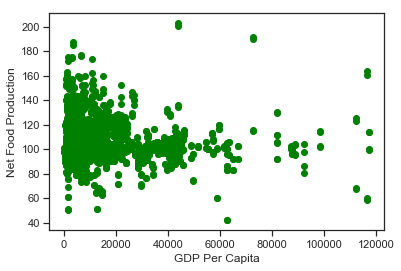

In [77]:
plt.scatter(food_prod_gdp_internet_use.gdp_per_capita, food_prod_gdp_internet_use.Net_Per_Capita_Prod, color = 'green')
plt.xlabel('GDP Per Capita')
plt.ylabel('Net Food Production')
plt.show()

The above scatter plot shows that majority of Countries with lower GDP tend have high net food production.

gdp_internet_use_2004 = gdp_and_internet_use.query=2004

lit_df = pd.read_csv('data/adult_literacy_rate.csv', nrows=153)
lit_df.head()

lit_df_new1 = lit_df.drop(['Subgroup', 'Source', 'Unit'], axis=1)
lit_df_new1.head()

lit_df_new = lit_df_new1.rename(columns = {'Country or Area':'Country', 'Year':'Year', 'Value':'Literacy Percentage'})
lit_df_new.tail()

#Changing the year type from object to interger
#lit_df_new['Year'].astype(int) 